In [348]:
import csv 
import matplotlib.pyplot as plt
import sinter
import numpy as np
import math

In [350]:
def read_data(filename):
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=',')
        data_samples = dict()

        for row in reader:    
            if row['id'] not in data_samples.keys(): 
                data_samples[row['id']] = dict()
                data_samples[row['id']]['shots'] = int(row['shots'])
                data_samples[row['id']]['bp_converged'] = int(row['bp_converged'])
                data_samples[row['id']]['max_bp_iters'] = int(row['max_bp_iters'])
                data_samples[row['id']]['postprocessing_count'] = int(row['postprocessing_count'])
                data_samples[row['id']]['per'] = float(row['per'][1:-1])
                data_samples[row['id']]['bias'] = float(row['bias'])
            else:
                for key in data_samples[row['id']].keys():
                    if key != 'per' and key != 'max_bp_iters' and key != 'bias':
                        data_samples[row['id']][key] += int(row[key])
    return(data_samples)

d8_data_samples = read_data('bp_iters_d8.csv')
d8_bias9999_fcc_samples = read_data('bp_iters_d8FloquetColourCode.csv')
d8_bias9999_hcc_samples = read_data('bp_iters_d8HoneycombCode.csv')
#d8_bias05_hcc_bposed = read_data('bposd_iters_d8HoneycombCode.csv')

In [351]:
samples_fcc = sinter.stats_from_csv_files('resume_20_9_bp/data_FloquetColourCode.csv')
samples_fcc_bposd_order200 = sinter.stats_from_csv_files('resume_25_9_bposd_order200/data_FloquetColourCode.csv')
samples_fcc_bposd_order100 = sinter.stats_from_csv_files('resume_25_9_bposd_order100/data_FloquetColourCode.csv')
samples_fcc_bposd_order40 = sinter.stats_from_csv_files('resume_25_9_bposd/data_FloquetColourCode.csv')
samples_hcc = sinter.stats_from_csv_files('resume_20_9_bp/data_HoneycombCode.csv')

### Bias = 0.5

In [352]:
def plot_convergance_rate(ax, data_samples,color):
    convergence_data = dict()
    pers = []
    convergence_ratio = []
    for data in data_samples.values():
        if data['per'] > 0.005:
            if data['max_bp_iters'] not in convergence_data:


                convergence_data[data['max_bp_iters']] = dict()
                convergence_data[data['max_bp_iters']]#['pers'] = []
                convergence_data[data['max_bp_iters']]#['convergence_ratio'] = []

            convergence_data[data['max_bp_iters']][data['per']] = data['bp_converged']/(data['shots'])
    # fix the line below to be more general
    b_colors = plt.get_cmap(color)(np.linspace(0.3, 1, 5))[::-1]

    for index,bp_iters in enumerate(convergence_data.keys()):
        convergence_ratio = []
        pers = list(convergence_data[bp_iters].keys())
        pers.sort()
        for per in pers:
            convergence_ratio.append(convergence_data[bp_iters][per])
        ax.plot(pers, convergence_ratio, label=bp_iters, color=b_colors[index], marker='o', markersize=12, linewidth=3 ) 
    


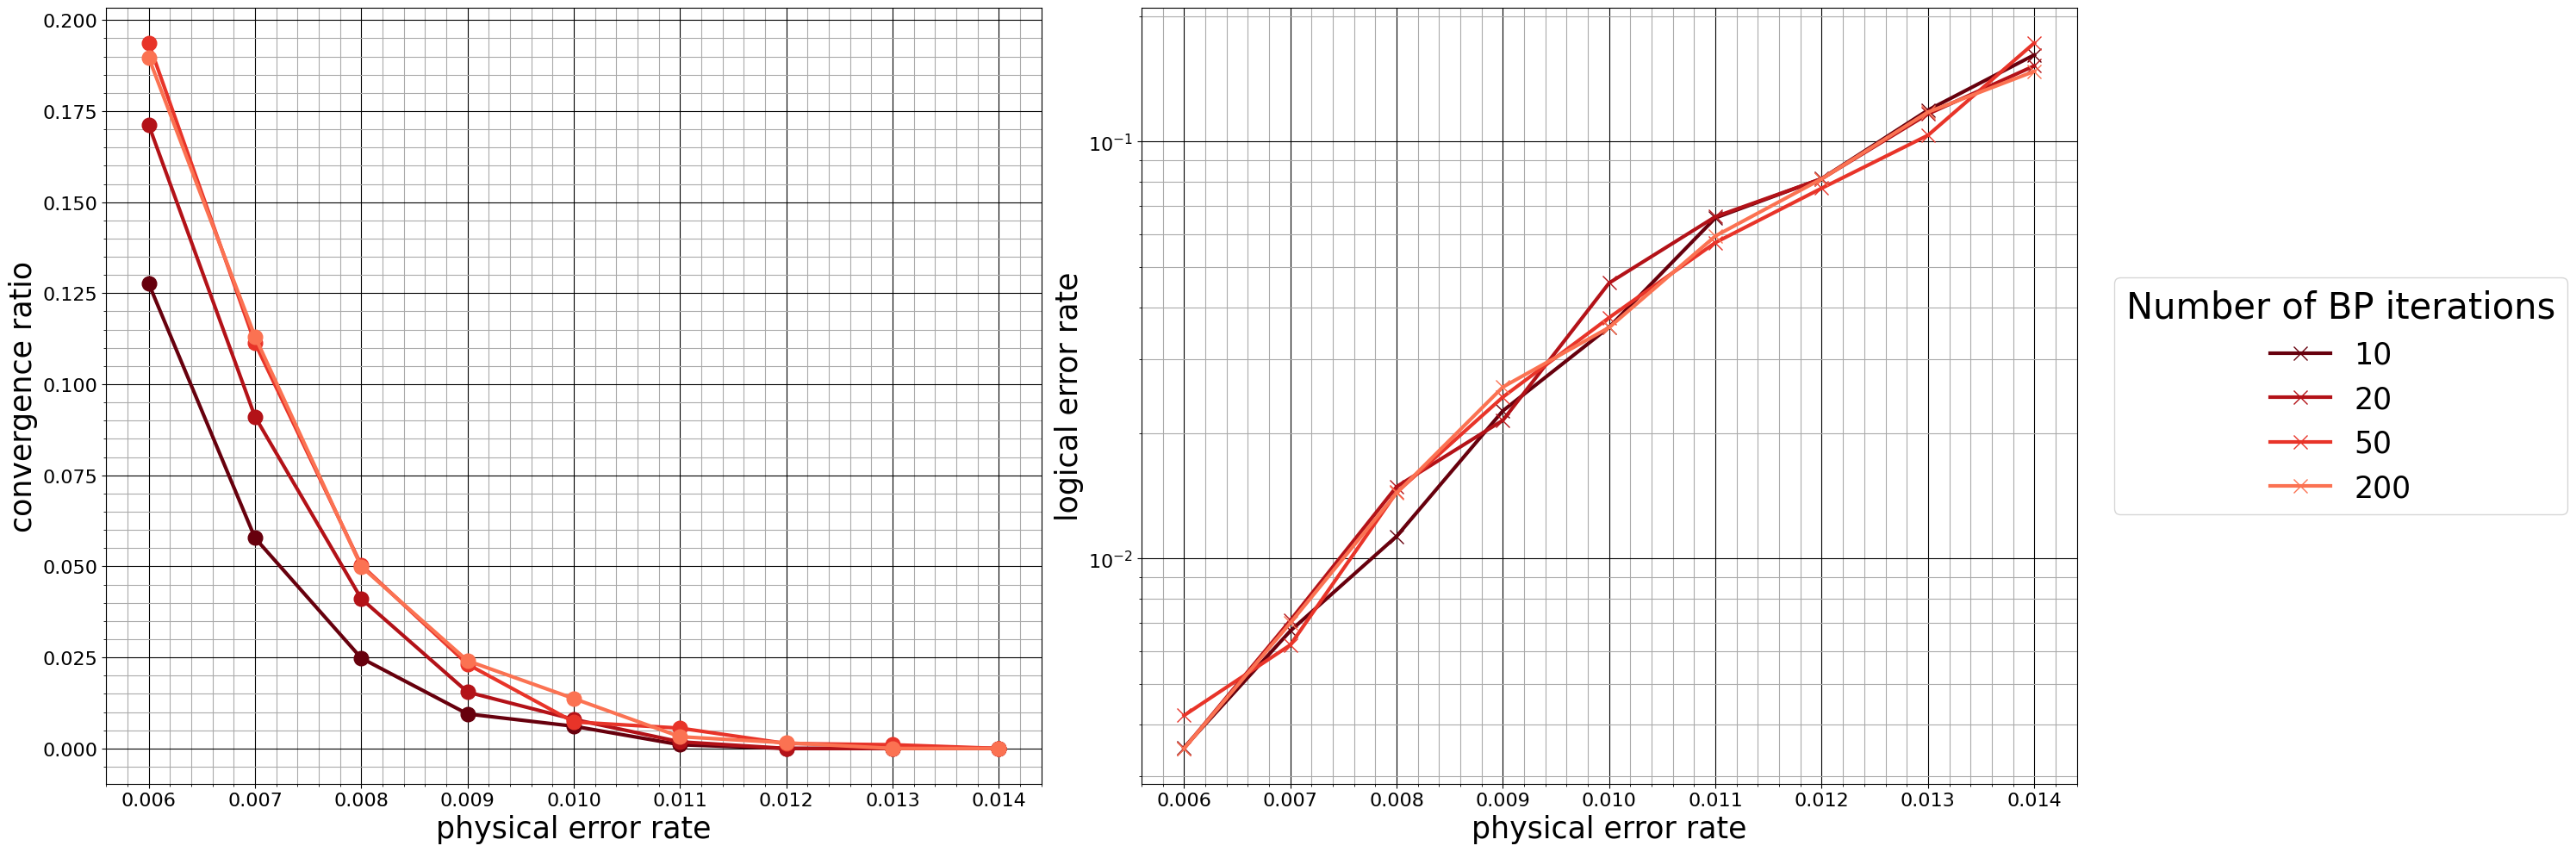

In [353]:
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(30,10))
plot_convergance_rate(ax[0],d8_data_samples,'Reds')
#ax[1].plot([],[],label='Number of beliefpropagation it)
sinter.plot_error_rate(
        ax=ax[1],
        stats=samples_fcc,
        group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 0.5,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': r_colors[index], 'linewidth':3, 'marker' : 'x', 'markersize':12},
)


# change y axis to log scale
#ax[1].legend(title='Number of BP iterations', title_fontsize=30, prop={'size':25})
ax[1].set_yscale('log')

# add title and labels
#ax[1].set_title("Error rate for d=8", fontsize=30)
ax[1].set_xlabel("physical error rate", fontsize=25)
ax[1].set_ylabel("logical error rate", fontsize=25)
ax[0].set_xlabel("physical error rate", fontsize=25)
ax[0].set_ylabel("convergence ratio", fontsize=25)
for a in ax:
    a.grid(which='minor', color='#AAAAAA')
    a.grid(which='major', color='black')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=16)

ax[1].legend(bbox_to_anchor=(1.04, 0.5), title='Number of BP iterations',loc="center left", borderaxespad=0, prop={'size':25}, title_fontsize=30)
plt.savefig('belief_matching_convergence_and_ler.svg', facecolor='white', transparent=False, dpi=300)
#fig.suptitle('Belief-matching convergance ratio and logical error rate for d=8 HCC with bias=0.5', fontsize=30)
#ax[0].legend()


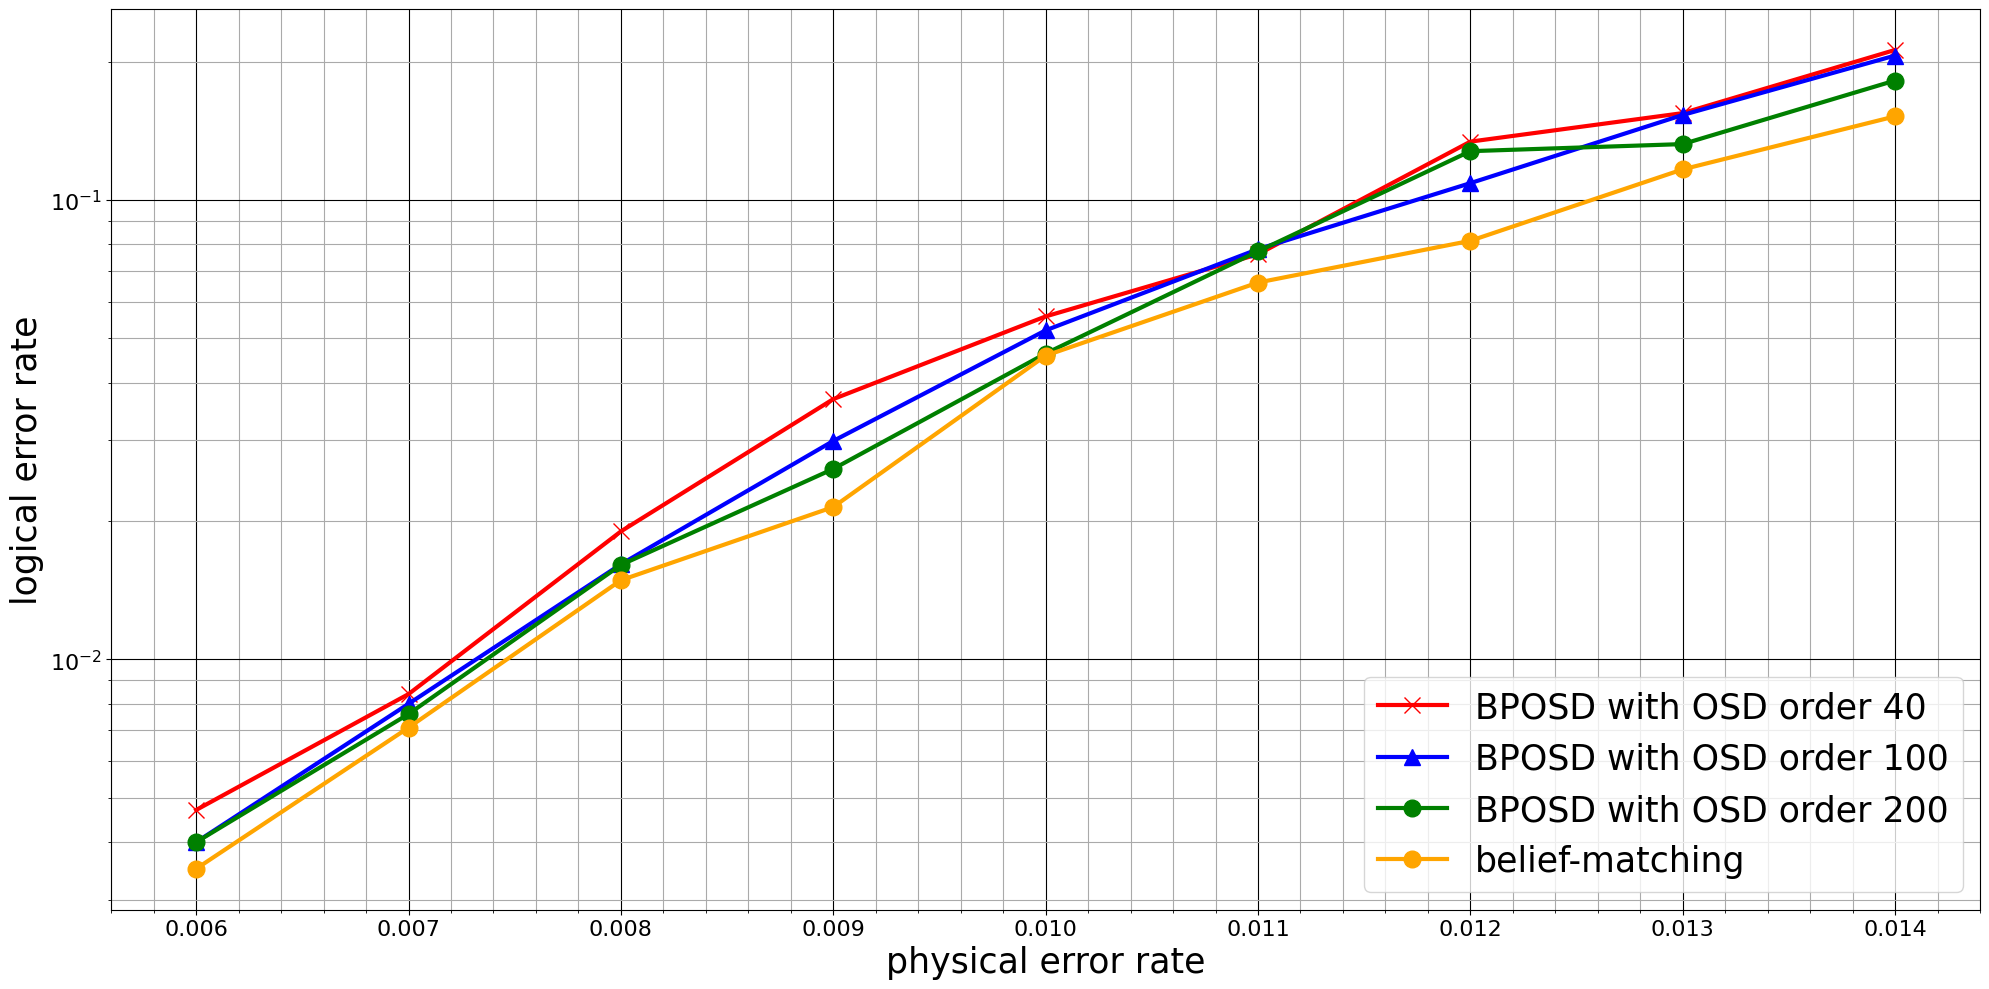

In [354]:
fig, ax = plt.subplots(1,1, tight_layout=True, figsize=(20,10))


sinter.plot_error_rate(
        ax=ax,
        stats=samples_fcc_bposd_order40,
        group_func=lambda stat: f"d={stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 0.5 and stat.json_metadata['bp_iters'] == 20,
        x_func=lambda stat: stat.json_metadata['p'],
        plot_args_func = lambda index,curve_id: {'color':'red', 'linewidth':3, 'marker' : 'x', 'label':f"BPOSD with OSD order 40", 'markersize':12},
        highlight_max_likelihood_factor=1,)
        
sinter.plot_error_rate(
        ax=ax,
        stats=samples_fcc_bposd_order100,
        group_func=lambda stat: f"d={stat.json_metadata['distance']}",
        filter_func=lambda stat: stat.json_metadata['bias'] == 0.5,
        x_func=lambda stat: stat.json_metadata['p'],
        plot_args_func = lambda index,curve_id: {'color': 'blue', 'linewidth':3, 'marker' : '^', 'label':f"BPOSD with OSD order 100", 'markersize':12},
        highlight_max_likelihood_factor=1,)
        
sinter.plot_error_rate(
        ax=ax,
        stats=samples_fcc_bposd_order200,
        group_func=lambda stat: f"d={stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 0.5 and stat.json_metadata['bp_iters'] == 20,
        x_func=lambda stat: stat.json_metadata['p'],
        plot_args_func = lambda index,curve_id: {'color': 'green', 'linewidth':3, 'marker' : 'o','markersize':12, 'label':f"BPOSD with OSD order 200"},
        highlight_max_likelihood_factor=1,)

sinter.plot_error_rate(
        ax=ax,
        stats=samples_fcc,
        group_func=lambda stat: f"d={stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 0.5 and stat.json_metadata['bp_iters'] == 20,
        x_func=lambda stat: stat.json_metadata['p'],
        plot_args_func = lambda index,curve_id: {'color': 'orange', 'linewidth':3, 'marker' : 'o','markersize':12, 'label':f"belief-matching"},
        highlight_max_likelihood_factor=1,)




ax.set_yscale('log')
ax.legend( prop={'size':25}, loc='lower right')



# add title and labels
#ax.set_title("Error rate for d=8", fontsize=30)
ax.set_xlabel("physical error rate", fontsize=25)
ax.set_ylabel("logical error rate", fontsize=25)
ax.grid(which='minor', color='#AAAAAA')
ax.grid(which='major', color='black')
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=16)
plt.savefig('belief_matching_vs_bposd.svg', facecolor='white', transparent=False, dpi=300)




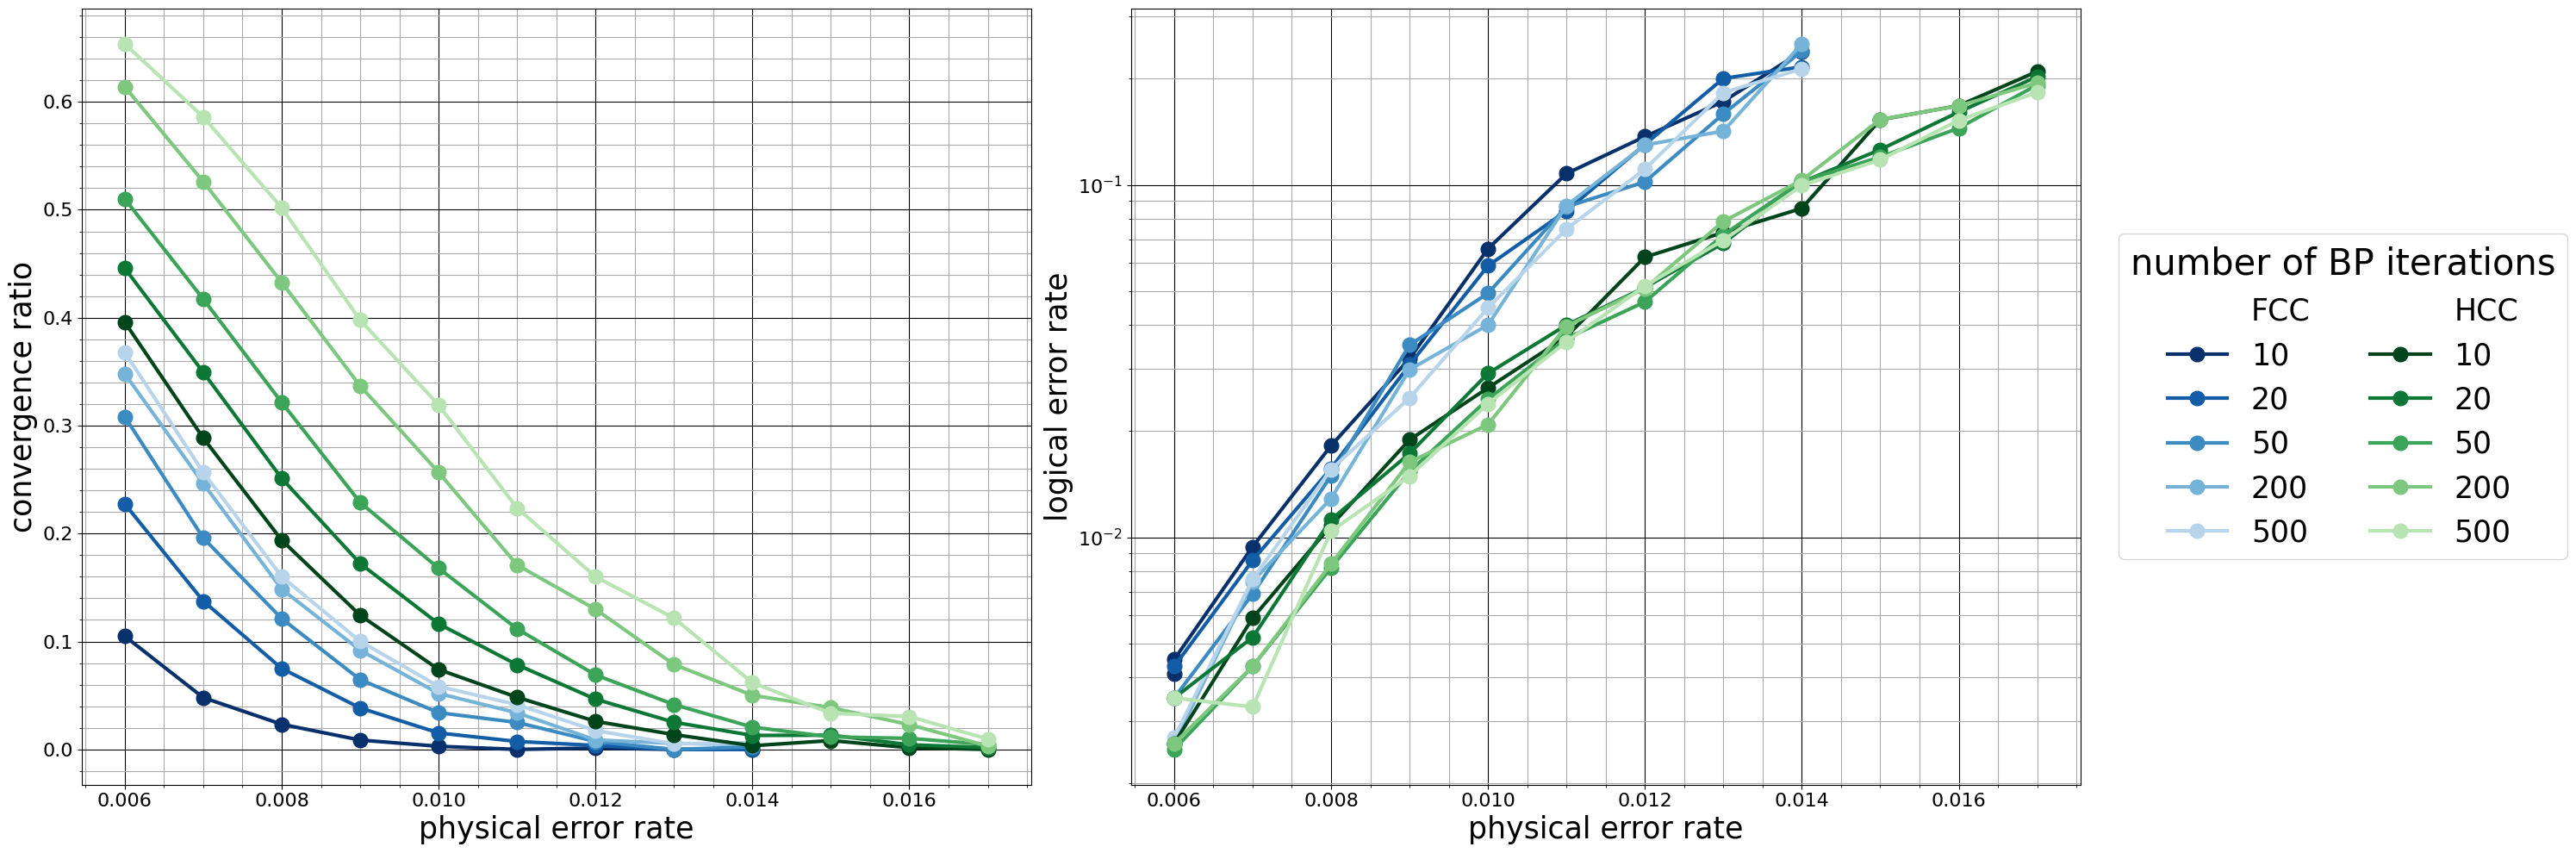

In [355]:
#create matplotlib ax
# add color map
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(30,10))
#ax[0].plot([], [], ' ', label="FCC")
plot_convergance_rate(ax[0],d8_bias9999_fcc_samples,'Blues')
#ax[0].plot([], [], ' ', label="HCC")
plot_convergance_rate(ax[0],d8_bias9999_hcc_samples, 'Greens')
ax[1].plot([], [], ' ', label="FCC")

b_colors = plt.get_cmap('Blues')(np.linspace(0.3, 1, 5))[::-1]

g_colors = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]

r_colors = plt.get_cmap('Reds')(np.linspace(0.3, 1, 5))[::-1]

sinter.plot_error_rate(
        ax=ax[1],
        stats=samples_fcc,
        group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999 and stat.json_metadata['p'] > 0.005,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': b_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'o'})

ax[1].plot([], [], ' ', label="HCC")
sinter.plot_error_rate(
        ax=ax[1],
        stats=samples_hcc,
        group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999 and stat.json_metadata['p'] > 0.005,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': g_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'o'})

ax[1].set_yscale('log')

ax[1].set_xlabel("physical error rate", fontsize=25)
ax[1].set_ylabel("logical error rate", fontsize=25)
ax[0].set_xlabel("physical error rate", fontsize=25)
ax[0].set_ylabel("convergence ratio", fontsize=25)

ax[1].legend(bbox_to_anchor=(1.04, 0.5), title='number of BP iterations',loc="center left", borderaxespad=0, prop={'size':25}, title_fontsize=30, ncol=2)

#ax[0].set_title("Convergance ratio for d=8 codes", fontsize=30)
#ax[1].set_title("Error rate for d=8 codes", fontsize=30)
for a in ax:
    a.grid(which='minor', color='#AAAAAA')
    a.grid(which='major', color='black')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=16)

plt.savefig('convergence_and_ler_fcc_vs_hcc.svg', facecolor='white', transparent=False, dpi=300)



In [356]:
samples_fcc = dict()
samples_fcc['1'] = sinter.stats_from_csv_files('resume_28_9_bp_order100/data_FloquetColourCode.csv')

samples_fcc['2'] = sinter.stats_from_csv_files('resume_28_9_bp_order100/data_Gauge2FloquetColourCode.csv')
samples_fcc['3'] = sinter.stats_from_csv_files('resume_28_9_bp_order100/data_Gauge3FloquetColourCode.csv')
samples_fcc['4'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_Gauge4FloquetColourCode.csv')
samples_fcc['5'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_Gauge5FloquetColourCode.csv')

samples_hcc = dict()
samples_hcc['1'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_HoneycombCode.csv')
samples_hcc['2'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_Gauge2HoneycombCode.csv')
samples_hcc['3'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_Gauge3HoneycombCode.csv')
samples_hcc['4'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_Gauge4HoneycombCode.csv')
samples_hcc['5'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_Gauge5HoneycombCode.csv')

d8_bias_32_fcc = read_data('bp_order20_d8FloquetColourCode.csv')
d8_bias_32_fcc_g2 = read_data('bp_order20_d8Gauge2FloquetColourCode.csv')
d8_bias_32_fcc_g3 = read_data('bp_order20_d8Gauge3FloquetColourCode.csv')
d8_bias_32_fcc_g4 = read_data('bp_order20_d8Gauge4FloquetColourCode.csv')
d8_bias_32_fcc_g5 = read_data('bp_order20_d8Gauge5FloquetColourCode.csv')
d8_bias_32_hcc = read_data('bp_order20_d8HoneycombCode.csv')
d8_bias_32_hcc_g2 = read_data('bp_order20_d8Gauge2HoneycombCode.csv')
d8_bias_32_hcc_g3 = read_data('bp_order20_d8Gauge3HoneycombCode.csv')
d8_bias_32_hcc_g4 = read_data('bp_order20_d8Gauge4HoneycombCode.csv')
d8_bias_32_hcc_g5 = read_data('bp_order20_d8Gauge5HoneycombCode.csv')


#d8_bias9999_fcc_samples = read_data('bp_iters_d8FloquetColourCode.csv')
#d8_bias9999_hcc_samples = read_data('bp_iters_d8HoneycombCode.csv')
#d8_bias05_hcc_bposed = read_data('bposd_iters_d8HoneycombCode.csv')

In [357]:
def plot_convergance_rate(ax, data_samples_gauges, color):
    convergence_data = dict()
    pers = []
    convergence_ratio = dict()
    for gauge_factor, data_samples in enumerate(data_samples_gauges):
        convergence_data[gauge_factor] = dict()
        for data in data_samples.values():
            if data['per'] > 0.005:
                convergence_data[gauge_factor][data['per']] = data['bp_converged']/(data['shots'])
    # fix the line below to be more general
    b_colors = plt.get_cmap(color)(np.linspace(0.3, 1, 5))[::-1]

    for index,gauge_factor  in enumerate(convergence_data.keys()): 
        convergence_ratio = []
        pers = list(convergence_data[gauge_factor].keys())
        pers.sort()
        for per in pers:
            convergence_ratio.append(convergence_data[gauge_factor][per])
        ax.plot(pers, convergence_ratio, label=gauge_factor+1, color=b_colors[index], marker='o', markersize=12, linewidth=3 )

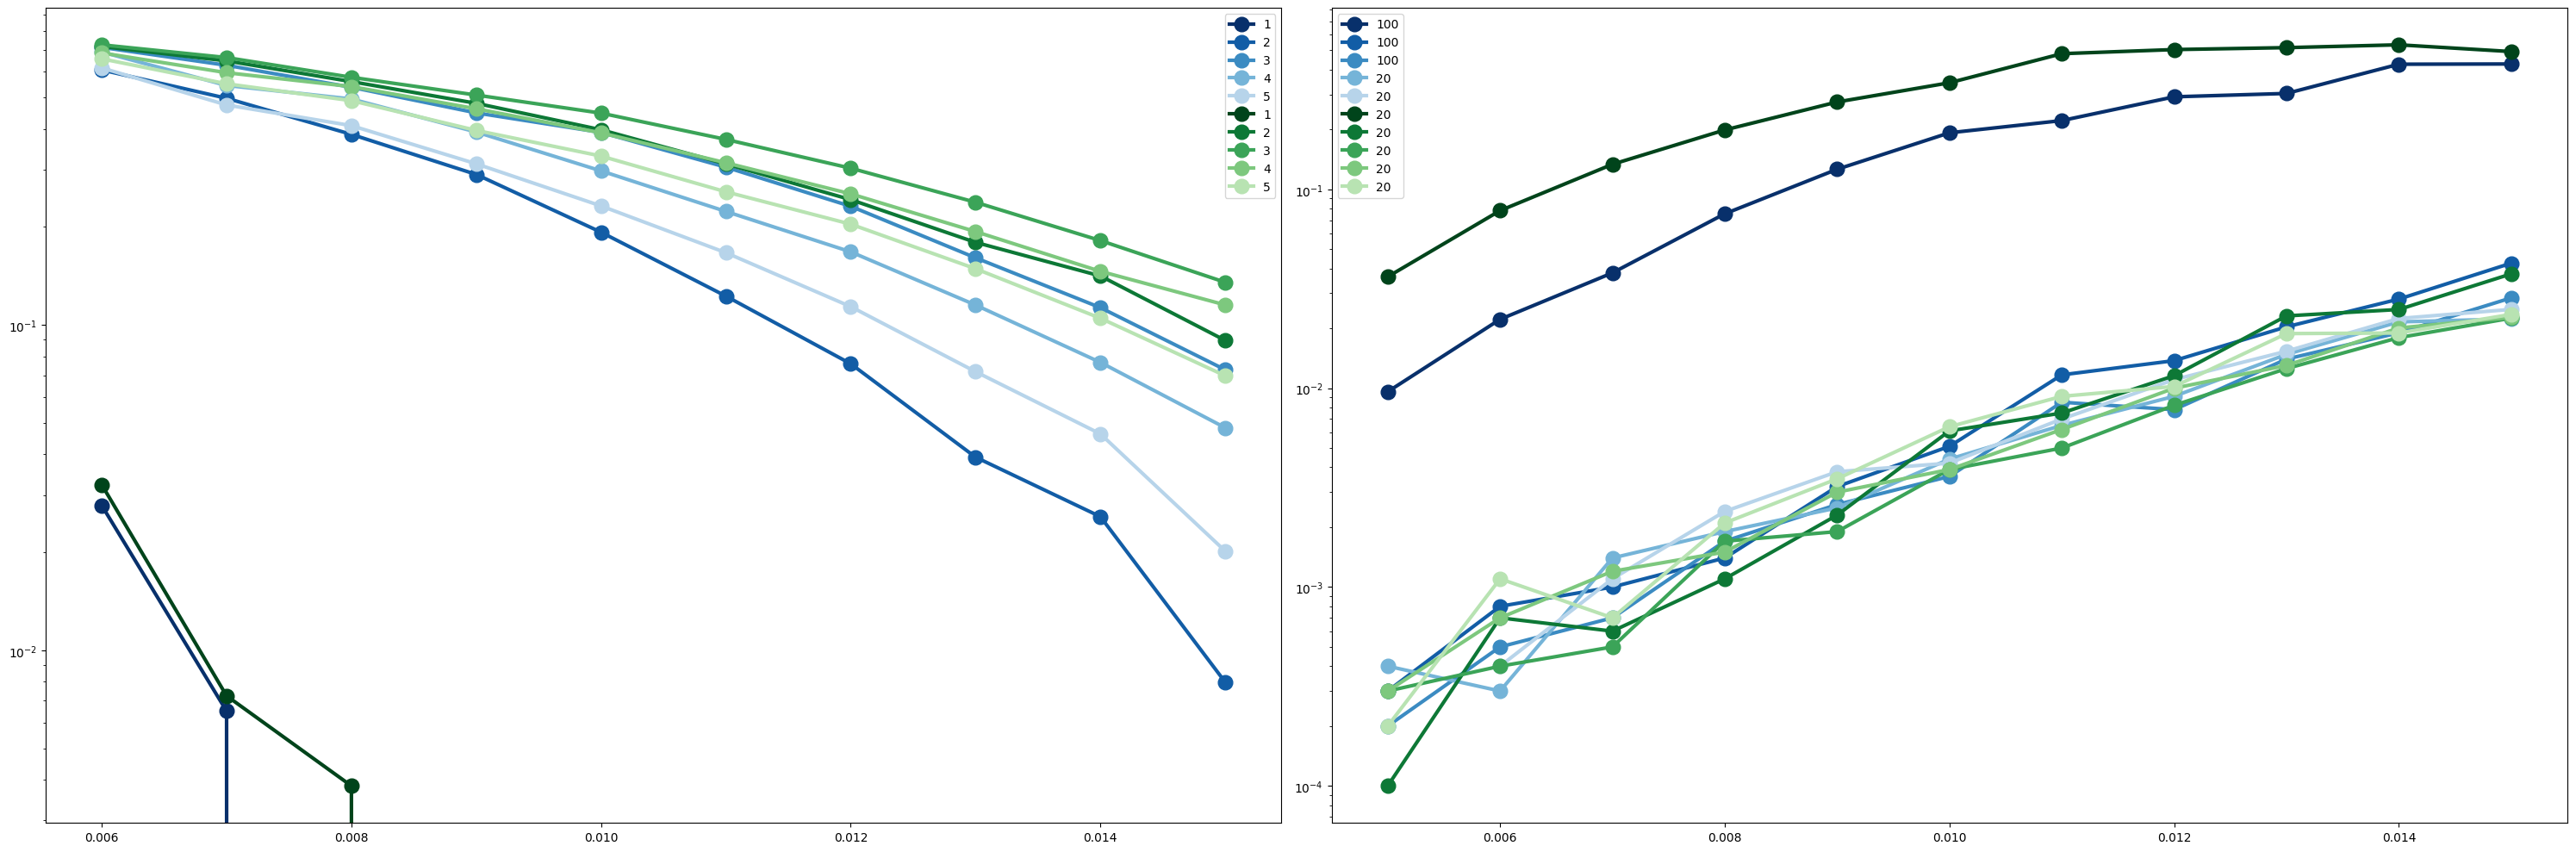

In [358]:
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(30,10))
#ax[0].plot([], [], ' ', label="FCC")
plot_convergance_rate(ax[0],[d8_bias_32_fcc, d8_bias_32_fcc_g2, d8_bias_32_fcc_g3, d8_bias_32_fcc_g4, d8_bias_32_fcc_g5], 'Blues')
plot_convergance_rate(ax[0],[d8_bias_32_hcc, d8_bias_32_hcc_g2, d8_bias_32_hcc_g3, d8_bias_32_hcc_g4, d8_bias_32_hcc_g5], 'Greens')
b_colors = plt.get_cmap('Blues')(np.linspace(0.3, 1, 5))[::-1]
g_colors = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]
for gauge_factor in [1,2,3,4,5]:
        sinter.plot_error_rate(
                ax=ax[1],
                stats=samples_fcc[str(gauge_factor)],
                group_func=lambda stat: f"{stat.json_metadata['bp_max_iter']}",
                filter_func=lambda stat: stat.json_metadata['distance'] == 8, #and stat.json_metadata['bias'] == 32 and stat.json_metadata['gauge_factor'] == gauge_factor,
                x_func=lambda stat: stat.json_metadata['p'],
                highlight_max_likelihood_factor=1,
                plot_args_func = lambda index,curve_id: {'color': b_colors[gauge_factor-1], 'markersize':12, 'linewidth':3, 'marker' : 'o'})
        
for gauge_factor in [1,2,3,4,5]:
        sinter.plot_error_rate(
                ax=ax[1],
                stats=samples_hcc[str(gauge_factor)],
                group_func=lambda stat: f"{stat.json_metadata['bp_max_iter']}",
                filter_func=lambda stat: stat.json_metadata['distance'] == 8, #and stat.json_metadata['bias'] == 32 and stat.json_metadata['gauge_factor'] == gauge_factor,
                x_func=lambda stat: stat.json_metadata['p'],
                highlight_max_likelihood_factor=1,
                plot_args_func = lambda index,curve_id: {'color': g_colors[gauge_factor-1], 'markersize':12, 'linewidth':3, 'marker' : 'o'})
ax[0].legend()
ax[1].legend()
ax[1].set_yscale('log')
ax[0].set_yscale('log')

NameError: name 'd4_bias_32_fcc' is not defined

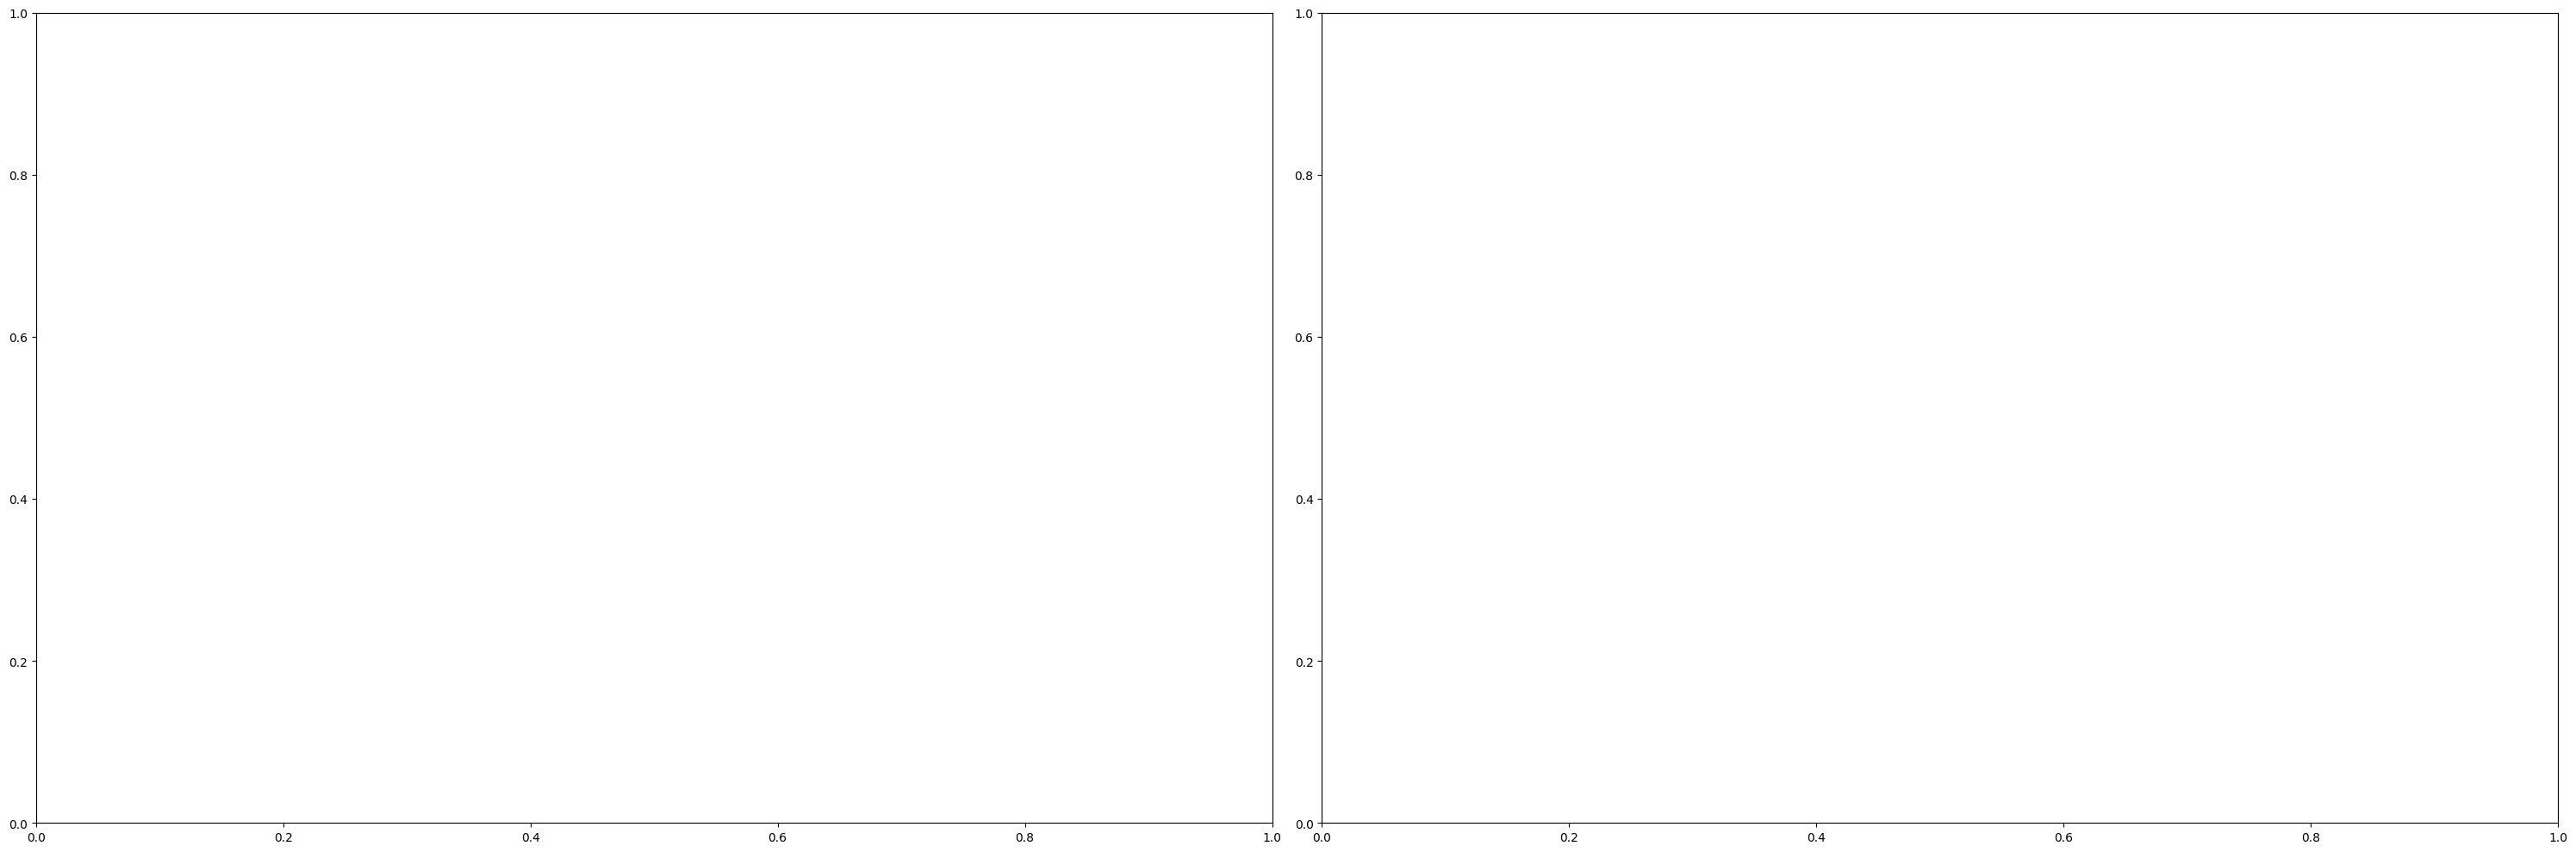

In [192]:
#create matplotlib ax
# add color map
fig, ax = plt.subplots(1,2, tight_layout=True, figsize=(30,10))
#ax[0].plot([], [], ' ', label="FCC")
plot_convergance_rate(ax[0],d4_bias_32_fcc,'Blues')
#ax[0].plot([], [], ' ', label="HCC")
plot_convergance_rate(ax[0],d8_bias9999_hcc_samples, 'Greens')
ax[1].plot([], [], ' ', label="FCC")

b_colors = plt.get_cmap('Blues')(np.linspace(0.3, 1, 5))[::-1]

g_colors = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]

r_colors = plt.get_cmap('Reds')(np.linspace(0.3, 1, 5))[::-1]

sinter.plot_error_rate(
        ax=ax[1],
        stats=samples_fcc,
        group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999 and stat.json_metadata['p'] > 0.005,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': g_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'o'})

ax[1].plot([], [], ' ', label="HCC")
sinter.plot_error_rate(
        ax=ax[1],
        stats=samples_hcc,
        group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
        filter_func=lambda stat: stat.json_metadata['distance'] == 8 and stat.json_metadata['bias'] == 9999 and stat.json_metadata['p'] > 0.005,
        x_func=lambda stat: stat.json_metadata['p'],
        highlight_max_likelihood_factor=1,
        plot_args_func = lambda index,curve_id: {'color': g_colors[index], 'markersize':12, 'linewidth':3, 'marker' : 'o'})

ax[1].set_yscale('log')

ax[1].set_xlabel("physical error rate", fontsize=25)
ax[1].set_ylabel("logical error rate", fontsize=25)
ax[0].set_xlabel("physical error rate", fontsize=25)
ax[0].set_ylabel("convergence ratio", fontsize=25)

ax[1].legend(bbox_to_anchor=(1.04, 0.5), title='number of BP iterations',loc="center left", borderaxespad=0, prop={'size':25}, title_fontsize=30, ncol=2)

#ax[0].set_title("Convergance ratio for d=8 codes", fontsize=30)
#ax[1].set_title("Error rate for d=8 codes", fontsize=30)
for a in ax:
    a.grid(which='minor', color='#AAAAAA')
    a.grid(which='major', color='black')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=16)

plt.savefig('convergence_and_ler_fcc_vs_hcc.svg', facecolor='white', transparent=False, dpi=300)

In [193]:
def read_data_fixed_per(filename):
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile, delimiter=',')
        data_samples = dict()

        for row in reader:    
            if row['bias'] not in data_samples.keys():
            #if row['id'] not in data_samples.keys(): 
                data_samples[row['bias']] = dict()
                data_samples[row['bias']]['shots'] = int(row['shots'])
                data_samples[row['bias']]['bp_converged'] = int(row['bp_converged'])
                data_samples[row['bias']]['max_bp_iters'] = int(row['max_bp_iters'])
                data_samples[row['bias']]['postprocessing_count'] = int(row['postprocessing_count'])
            else:
                for key in data_samples[row['bias']].keys():
                    if key != 'per' and key != 'max_bp_iters' and key != 'bias':
                        data_samples[row['bias']][key] += int(row[key])
    return(data_samples)


In [194]:
d8_FloquetColourCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8FloquetColourCode.csv')
d8_Gauge2FloquetColourCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8Gauge2FloquetColourCode.csv')
d8_Gauge3FloquetColourCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8Gauge3FloquetColourCode.csv')
d8_Gauge4FloquetColourCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8Gauge4FloquetColourCode.csv')
d8_Gauge5FloquetColourCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8Gauge5FloquetColourCode.csv')

d8_HoneycombCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8HoneycombCode.csv')
d8_Gauge2HoneycombCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8Gauge2HoneycombCode.csv')
d8_Gauge3HoneycombCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8Gauge3HoneycombCode.csv')
d8_Gauge4HoneycombCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8Gauge4HoneycombCode.csv')
#d8_Gauge5HoneycombCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d8Gauge5HoneycombCode.csv')

d4_Gauge5HoneycombCode = read_data_fixed_per('./resume_1_10_bp_fixed_per/d4Gauge5HoneycombCode.csv')

samples_fcc = dict()
samples_fcc['1'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_FloquetColourCode.csv')
samples_fcc['2'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_Gauge2FloquetColourCode.csv')
samples_fcc['3'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_Gauge3FloquetColourCode.csv')
samples_fcc['4'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_Gauge4FloquetColourCode.csv')
samples_fcc['5'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_Gauge5FloquetColourCode.csv')

samples_hcc = dict()
samples_hcc['1'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_HoneycombCode.csv')
samples_hcc['2'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_Gauge2HoneycombCode.csv')
samples_hcc['3'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_Gauge3HoneycombCode.csv')
samples_hcc['4'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_Gauge4HoneycombCode.csv')
samples_hcc['5'] = sinter.stats_from_csv_files('resume_1_10_bp_fixed_per/data_Gauge5HoneycombCode.csv')
#samples_fcc['2'] = sinter.stats_from_csv_files('resume_28_9_bp_order100/data_Gauge2FloquetColourCode.csv')
#samples_fcc['3'] = sinter.stats_from_csv_files('resume_28_9_bp_order100/data_Gauge3FloquetColourCode.csv')
#samples_fcc['4'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_Gauge4FloquetColourCode.csv')
#samples_fcc['5'] = sinter.stats_from_csv_files('resume_27_9_bp_order20/data_Gauge5FloquetColourCode.csv')


In [195]:
print(d4_FloquetColourCode)
print()

NameError: name 'd4_FloquetColourCode' is not defined

In [196]:
def plot_convergance_rate_fixed_per(ax, data_samples_gauges, color):
    
    convergence_data = dict()
    pers = []
    convergence_ratio = dict()
    for gauge_factor, data_samples in enumerate(data_samples_gauges):
        convergence_data[gauge_factor] = dict()
        for bias, data in data_samples.items():
            convergence_data[gauge_factor][float(bias)] = data['bp_converged']/(data['shots'])
    # fix the line below to be more general
    b_colors = plt.get_cmap(color)(np.linspace(0.3, 1, 5))[::-1]

    for index,gauge_factor  in enumerate(convergence_data.keys()): 
        convergence_ratio = []
        pers = list(convergence_data[gauge_factor].keys())
        pers.sort()
        for per in pers:
            convergence_ratio.append(convergence_data[gauge_factor][per])
        ax.plot(pers, convergence_ratio, label=gauge_factor+1, color=b_colors[index], marker='o', markersize=12, linewidth=3 )

AttributeError: 'numpy.ndarray' object has no attribute 'legend'

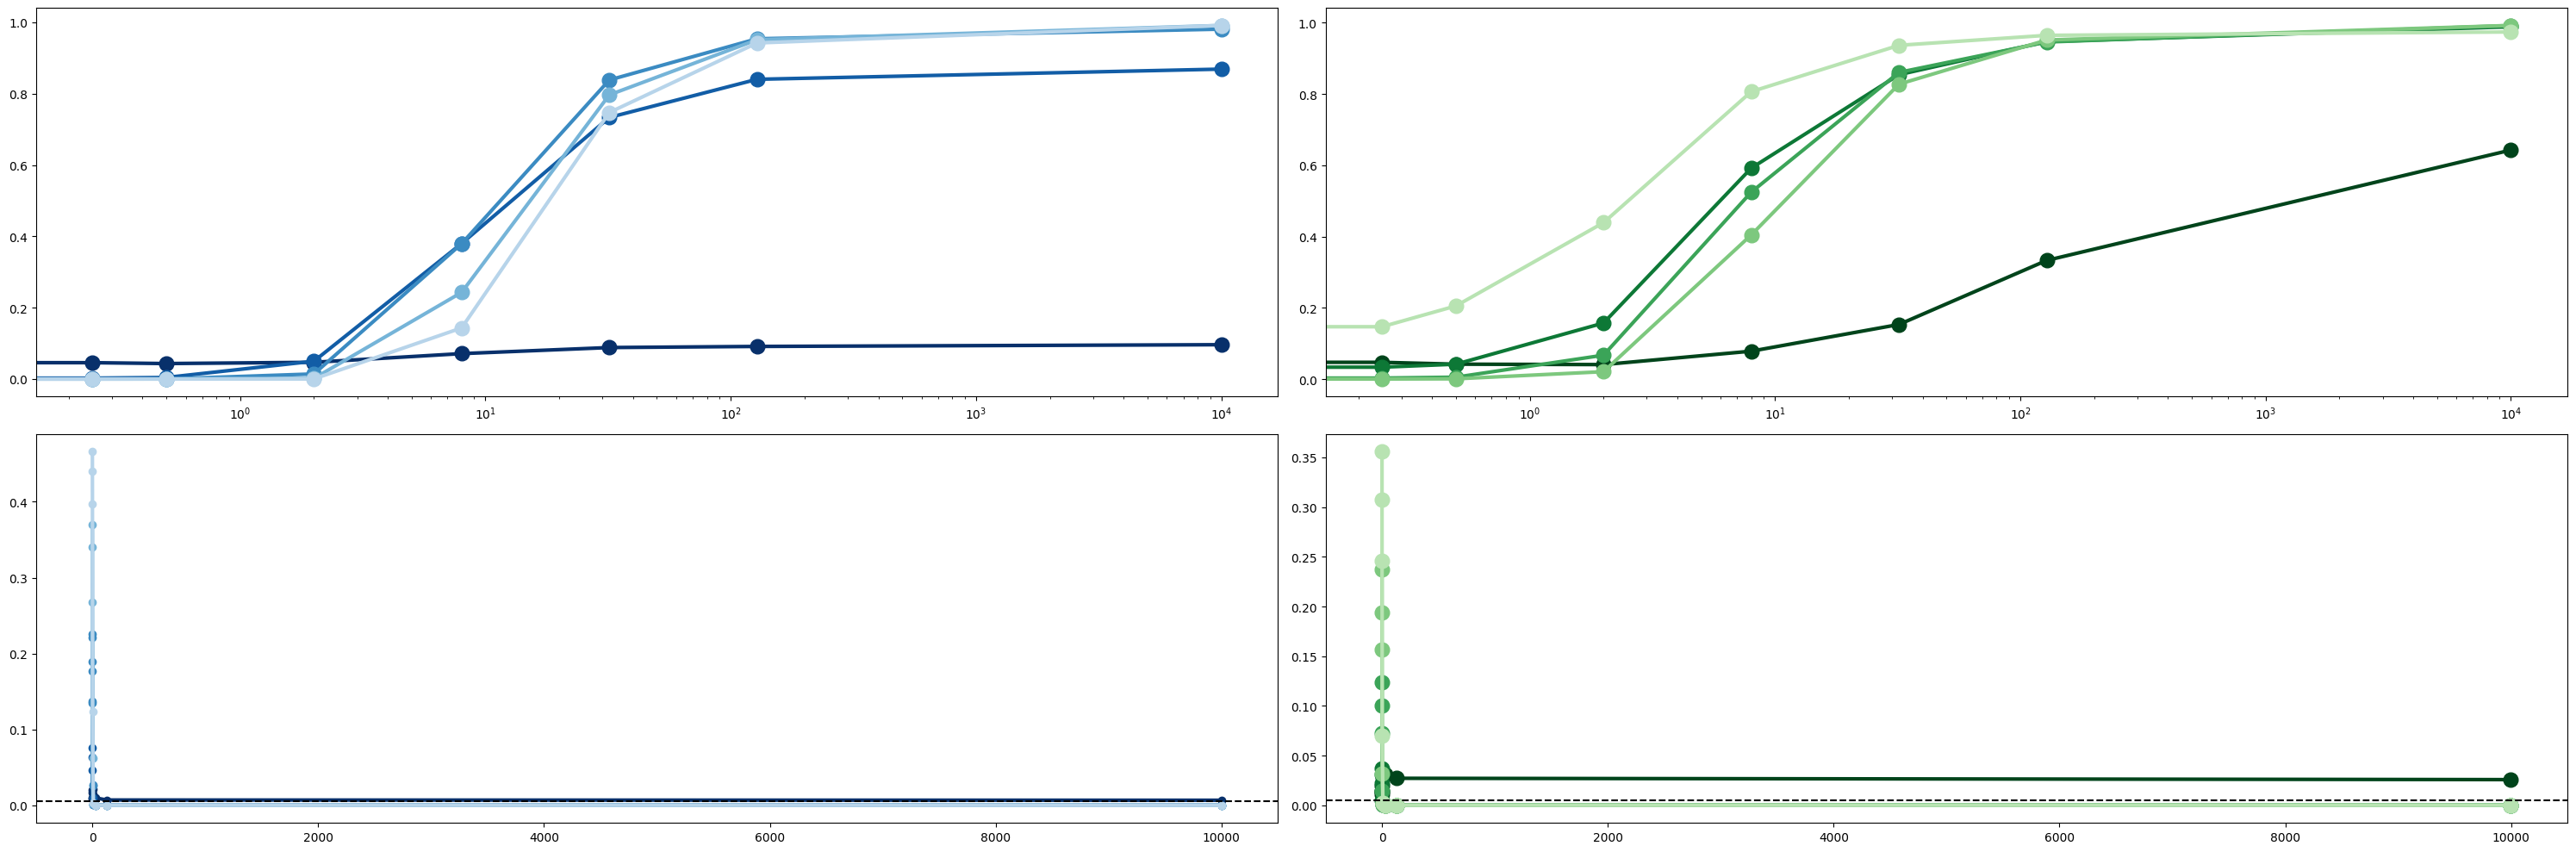

In [197]:
fig, ax = plt.subplots(2,2, tight_layout=True, figsize=(30,10))
plot_convergance_rate_fixed_per(ax[0][0], [d8_FloquetColourCode, d8_Gauge2FloquetColourCode, d8_Gauge3FloquetColourCode, d8_Gauge4FloquetColourCode, d8_Gauge5FloquetColourCode], 'Blues')
plot_convergance_rate_fixed_per(ax[0][1], [d8_HoneycombCode, d8_Gauge2HoneycombCode, d8_Gauge3HoneycombCode, d8_Gauge4HoneycombCode, d4_Gauge5HoneycombCode], 'Greens')

ax[0][0].set_xscale('log')
ax[0][1].set_xscale('log')
blues = plt.get_cmap('Blues')(np.linspace(0.3, 1, 5))[::-1]
greens = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]

for gauge_factor in [1,2,3,4,5]:
        sinter.plot_error_rate(
                ax=ax[1][0],
                stats=samples_fcc[str(gauge_factor)],
                #group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
                filter_func=lambda stat: stat.json_metadata['distance'] == 8,
                x_func=lambda stat: stat.json_metadata['bias'],
                highlight_max_likelihood_factor=1,
                plot_args_func = lambda index,curve_id: {'color': blues[gauge_factor-1], 'linewidth':3, 'marker' : 'o', 'label':f"gauge factor {gauge_factor}"})
        
        sinter.plot_error_rate(
                ax=ax[1][1],
                stats=samples_hcc[str(gauge_factor)],
                #group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
                filter_func=lambda stat: stat.json_metadata['distance'] == 8,
                x_func=lambda stat: stat.json_metadata['bias'],
                highlight_max_likelihood_factor=1,
                plot_args_func = lambda index,curve_id: {'color': greens[gauge_factor-1], 'linewidth':3, 'marker' : 'o', 'markersize':12, 'label':f"gauge factor {gauge_factor}"})
        
# plot vertical line at y=0.05 in ax[1][1]
ax[1][0].axhline(y=0.005, color='black', linestyle='--', label='pseudothreshold')
ax[1][1].axhline(y=0.005, color='black', linestyle='--', label='pseudothreshold')


ax[1].legend(bbox_to_anchor=(1.04, 0.5), title='number of BP iterations',loc="center left", borderaxespad=0, prop={'size':25}, title_fontsize=30, ncol=2)

#ax[0].set_title("Convergance ratio for d=8 codes", fontsize=30)
#ax[1].set_title("Error rate for d=8 codes", fontsize=30)
for a in ax[1]:
    a.grid(which='minor', color='#AAAAAA')
    a.grid(which='major', color='black')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=16)

for a in ax[1]:
        a.set_yscale('log')
        a.set_xscale('log')
        a.legend()

In [198]:
d8_FloquetColourCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8FloquetColourCode.csv')
d8_Gauge2FloquetColourCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8Gauge2FloquetColourCode.csv')
d8_Gauge3FloquetColourCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8Gauge3FloquetColourCode.csv')
d8_Gauge4FloquetColourCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8Gauge4FloquetColourCode.csv')
d8_Gauge5FloquetColourCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8Gauge5FloquetColourCode.csv')



samples_fcc = dict()
samples_fcc['1'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_FloquetColourCode.csv')
samples_fcc['2'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_Gauge2FloquetColourCode.csv')
samples_fcc['3'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_Gauge3FloquetColourCode.csv')
samples_fcc['4'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_Gauge4FloquetColourCode.csv')
samples_fcc['5'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_Gauge5FloquetColourCode.csv')

d8_HoneycombCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8HoneycombCode.csv')
d8_Gauge2HoneycombCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8Gauge2HoneycombCode.csv')
d8_Gauge3HoneycombCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8Gauge3HoneycombCode.csv')
d8_Gauge4HoneycombCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8Gauge4HoneycombCode.csv')
d8_Gauge5HoneycombCode = read_data_fixed_per('./resume_4_10_bp_fixed_per/d8Gauge5HoneycombCode.csv')

samples_hcc = dict()
samples_hcc['1'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_HoneycombCode.csv')
samples_hcc['2'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_Gauge2HoneycombCode.csv')
samples_hcc['3'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_Gauge3HoneycombCode.csv')
samples_hcc['4'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_Gauge4HoneycombCode.csv')
samples_hcc['5'] = sinter.stats_from_csv_files('resume_4_10_bp_fixed_per/data_Gauge5HoneycombCode.csv')


Text(0, 0.5, 'convergence ratio')

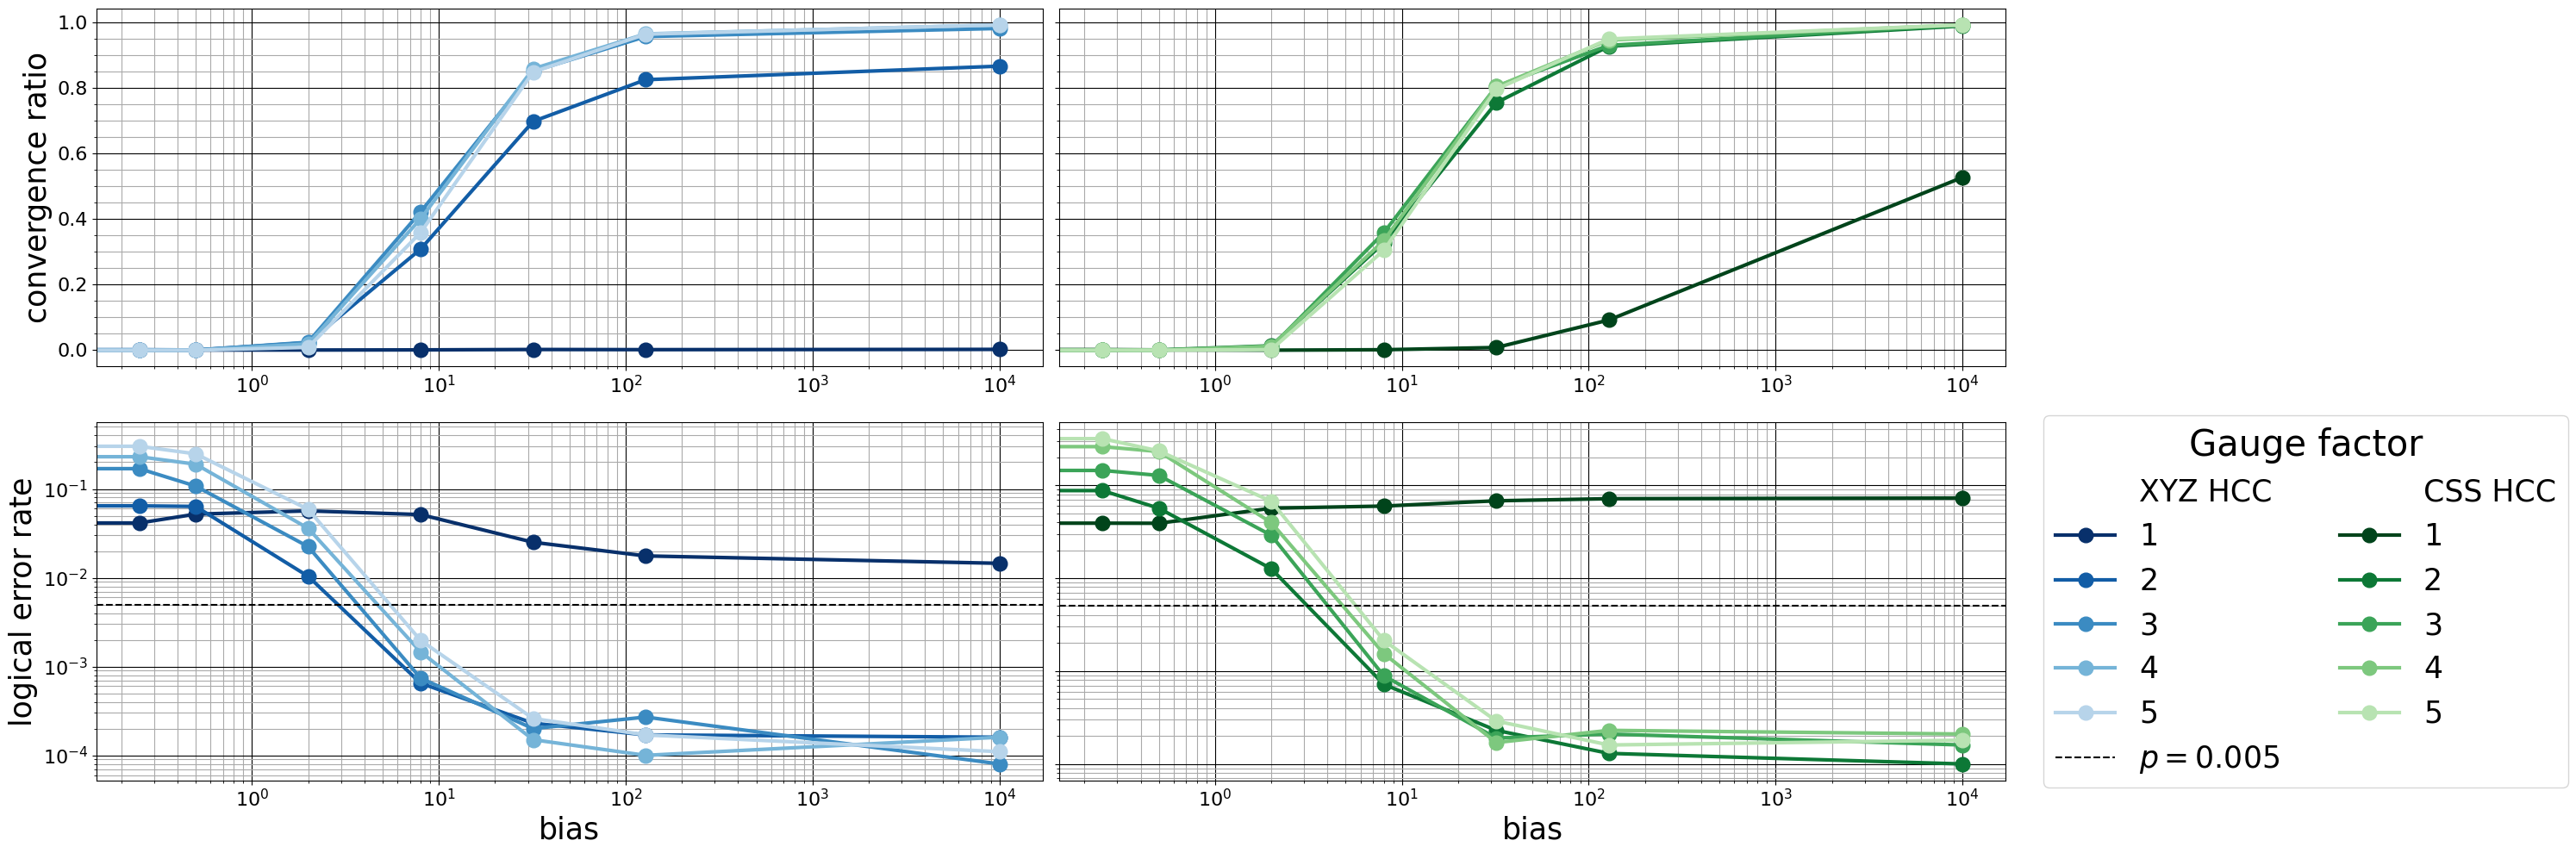

In [268]:
fig, ax = plt.subplots(2,2, tight_layout=True, figsize=(30,10))
plot_convergance_rate_fixed_per(ax[0][0], [d8_FloquetColourCode, d8_Gauge2FloquetColourCode, d8_Gauge3FloquetColourCode, d8_Gauge4FloquetColourCode, d8_Gauge5FloquetColourCode], 'Blues')
plot_convergance_rate_fixed_per(ax[0][1], [d8_HoneycombCode, d8_Gauge2HoneycombCode, d8_Gauge3HoneycombCode, d8_Gauge4HoneycombCode, d8_Gauge5HoneycombCode], 'Greens')

ax[1][0].plot([], [], ' ', label="XYZ HCC")
ax[1][1].plot([], [], ' ', label="CSS HCC")

ax[0][0].set_xscale('log')
ax[0][1].set_xscale('log')
blues = plt.get_cmap('Blues')(np.linspace(0.3, 1, 5))[::-1]
greens = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]

for gauge_factor in [1,2,3,4,5]:
        sinter.plot_error_rate(
                ax=ax[1][0],
                stats=samples_fcc[str(gauge_factor)],
                #group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
                filter_func=lambda stat: stat.json_metadata['distance'] == 8,
                x_func=lambda stat: stat.json_metadata['bias'],
                highlight_max_likelihood_factor=1,
                plot_args_func = lambda index,curve_id: {'color': blues[gauge_factor-1], 'linewidth':3, 'marker' : 'o', 'markersize': 12, 'label':f"{gauge_factor}"})
        
        sinter.plot_error_rate(
                ax=ax[1][1],
                stats=samples_hcc[str(gauge_factor)],
                #group_func=lambda stat: f"{stat.json_metadata['bp_iters']}",
                filter_func=lambda stat: stat.json_metadata['distance'] == 8,
                x_func=lambda stat: stat.json_metadata['bias'],
                highlight_max_likelihood_factor=1,
                plot_args_func = lambda index,curve_id: {'color': greens[gauge_factor-1], 'linewidth':3, 'marker' : 'o', 'markersize':12, 'label':f"{gauge_factor}"})
        
# plot vertical line at y=0.05 in ax[1][1]
ax[1][0].axhline(y=0.005, color='black', linestyle='--', label='$p=0.005$')
ax[1][1].axhline(y=0.005, color='black', linestyle='--', label='$p=0.005$')

h1, l1 = ax[1][0].get_legend_handles_labels()
h2, l2 = ax[1][1].get_legend_handles_labels()
h1.extend(h2[:-1])
l1.extend(l2[:-1])

for a in ax[1]:
        a.set_yscale('log')
        a.set_xscale('log')
        
for a2 in ax:
        for a in a2:
                a.grid(which='minor', color='#AAAAAA')
                a.grid(which='major', color='black')
                a.minorticks_on()
                a.tick_params(axis='both', which='major', labelsize=16)
ax[0][1].set_yticklabels([])
ax[1][1].set_yticklabels([])
ax[1][1].legend(h1, l1, bbox_to_anchor=(1.04, 0.5), title='Gauge factor',loc="center left", borderaxespad=0, prop={'size':25}, title_fontsize=30, ncol=2)

ax[1][0].set_xlabel("bias", fontsize=25)
ax[1][1].set_xlabel("bias", fontsize=25)
ax[1][0].set_ylabel("logical error rate", fontsize=25)
ax[0][0].set_ylabel("convergence ratio", fontsize=25)


In [366]:
samples_fcc_boundary = sinter.stats_from_csv_files('resume_13_10/data_Gauge2FloquetColourCode_True.csv')
samples_fcc = sinter.stats_from_csv_files('resume_13_10/data_Gauge2FloquetColourCode_False.csv')
#samples_fcc_bposd_order200 = sinter.stats_from_csv_files('resume_25_9_bposd_order200/data_FloquetColourCode.csv')
print(samples_fcc_boundary)

[sinter.TaskStats(strong_id='9ccfd3ea1ba40ef66697f8f2c6437027cb5bc4ec9dbcd7d41ae64bdefd5c80aa', decoder='beliefmatching', json_metadata={'bias': inf, 'bias_type': 'measurement_vs_data_qubit', 'bp_max_iter': 200, 'code': 'Gauge2FloquetColourCode', 'distance': 4, 'layers': 5.0, 'm': 0.01469, 'p': 0.005, 'q': 0, 'set_final_detector_schedule': True}, shots=10000, errors=1, seconds=2.652), sinter.TaskStats(strong_id='8b91211b094938e160f171dd99cc20389b9baea1dbee4b545b3a5e6dd4766c7d', decoder='beliefmatching', json_metadata={'bias': inf, 'bias_type': 'measurement_vs_data_qubit', 'bp_max_iter': 200, 'code': 'Gauge2FloquetColourCode', 'distance': 8, 'layers': 10.0, 'm': 0.01484, 'p': 0.005, 'q': 0, 'set_final_detector_schedule': True}, shots=10000, seconds=43.607), sinter.TaskStats(strong_id='e593d144c3a414b5cbf44ad022f703ca1d283c7a365e8a2d7ee21e1e94f22491', decoder='beliefmatching', json_metadata={'bias': inf, 'bias_type': 'measurement_vs_data_qubit', 'bp_max_iter': 200, 'code': 'Gauge2Floquet

In [369]:
samples_fcc3_triple = sinter.stats_from_csv_files('resume_19_10_bp_osd/data_Gauge3FloquetColourCode_triple.csv')
samples_fcc3_double = sinter.stats_from_csv_files('resume_13_10_bp_osd/data_Gauge3FloquetColourCode_double.csv')
samples_fcc3_single = sinter.stats_from_csv_files('resume_13_10_bp_osd/data_Gauge3FloquetColourCode_single.csv')
samples_fcc_triple = sinter.stats_from_csv_files('resume_19_10_bp_osd/data_FloquetColourCode_triple.csv')
samples_fcc2_triple = sinter.stats_from_csv_files('resume_19_10_bp_osd/data_Gauge2FloquetColourCode_triple.csv')
samples_fcc4_triple = sinter.stats_from_csv_files('resume_19_10_bp_osd/data_Gauge4FloquetColourCode_triple.csv')
samples_fcc5_triple = sinter.stats_from_csv_files('resume_19_10_bp_osd/data_Gauge5FloquetColourCode_triple.csv')
#samples_fcc_bposd_order200 = sinter.stats_from_csv_files('resume_25_9_bposd_order200/data_FloquetColourCode.csv')


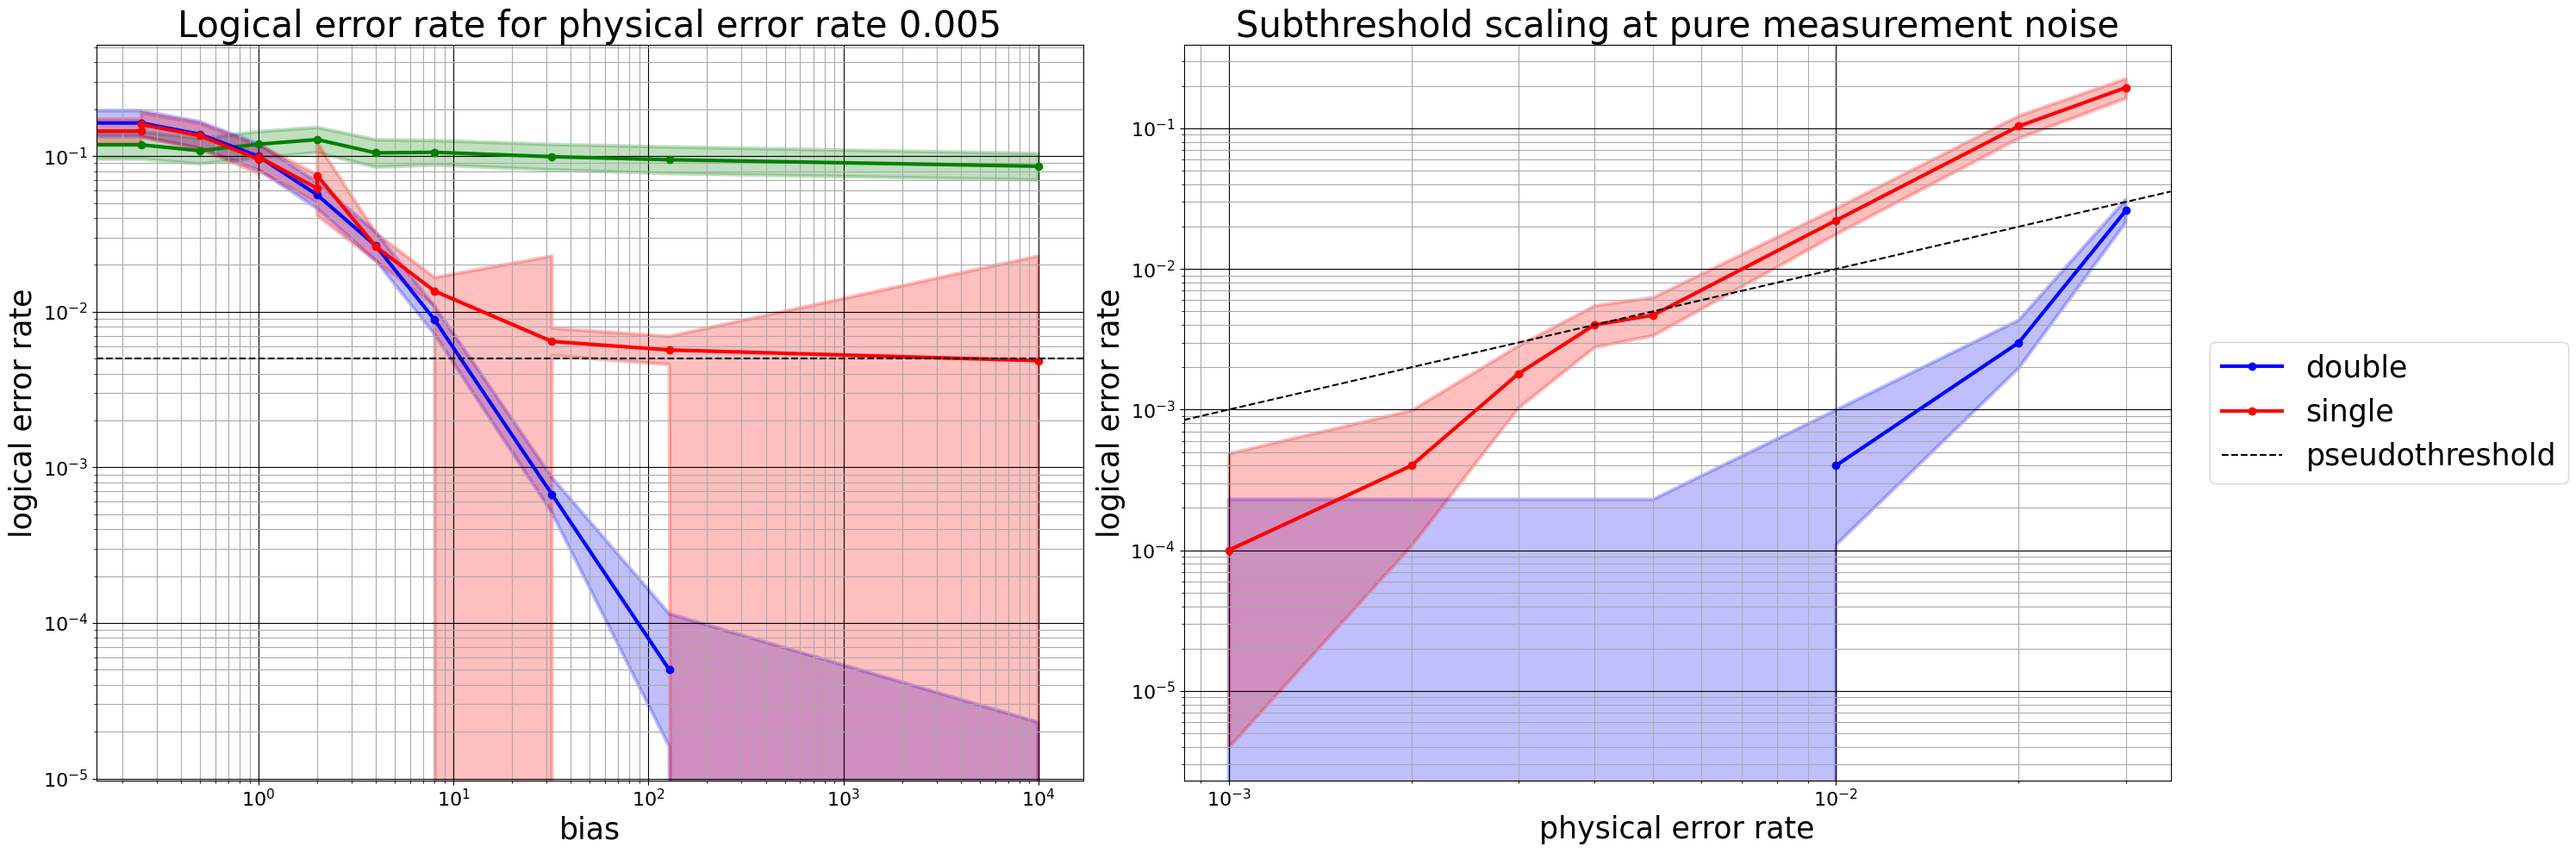

In [368]:
fig, ax = plt.subplots(1,2, tight_layout=False, figsize=(30,10))

per = 0.005
sinter.plot_error_rate(
                ax=ax[0],
                stats=samples_fcc_triple,
                filter_func=lambda stat: stat.json_metadata['distance'] == 4 and stat.json_metadata['p'] == per,
                x_func=lambda stat: stat.json_metadata['bias'],
                highlight_max_likelihood_factor=10,
                plot_args_func = lambda index,curve_id: {'color': 'green', 'linewidth':3, 'marker' : 'o', 'label': 'triple'})

sinter.plot_error_rate(
                ax=ax[0],
                stats=samples_fcc_double,
                filter_func=lambda stat: stat.json_metadata['distance'] == 4 and stat.json_metadata['p'] == per,
                x_func=lambda stat: stat.json_metadata['bias'],
                highlight_max_likelihood_factor=10,
                plot_args_func = lambda index,curve_id: {'color': 'blue', 'linewidth':3, 'marker' : 'o', 'label': 'double'})

sinter.plot_error_rate(
                ax=ax[0],
                stats=samples_fcc_single,
                filter_func=lambda stat: stat.json_metadata['distance'] == 4 and stat.json_metadata['p'] == per,
                x_func=lambda stat: stat.json_metadata['bias'],
                highlight_max_likelihood_factor=10,
                plot_args_func = lambda index,curve_id: {'color': 'red', 'linewidth':3, 'marker' : 'o', 'label': 'single'})

sinter.plot_error_rate(
                ax=ax[1],
                stats=samples_fcc_triple,
                filter_func=lambda stat: stat.json_metadata['distance'] == 4 and stat.json_metadata['bias'] == math.inf,
                x_func=lambda stat: stat.json_metadata['p'],
                highlight_max_likelihood_factor=10,
                plot_args_func = lambda index,curve_id: {'color': 'green', 'linewidth':3, 'marker' : 'o', 'label': 'triple'})

sinter.plot_error_rate(
                ax=ax[1],
                stats=samples_fcc_double,
                filter_func=lambda stat: stat.json_metadata['distance'] == 4 and stat.json_metadata['bias'] == math.inf,
                x_func=lambda stat: stat.json_metadata['p'],
                highlight_max_likelihood_factor=10,
                plot_args_func = lambda index,curve_id: {'color': 'blue', 'linewidth':3, 'marker' : 'o', 'label': 'double' })

sinter.plot_error_rate(
                ax=ax[1],
                stats=samples_fcc_single,
                filter_func=lambda stat: stat.json_metadata['distance'] == 4 and stat.json_metadata['bias'] == math.inf,
                x_func=lambda stat: stat.json_metadata['p'],
                highlight_max_likelihood_factor=10,
                plot_args_func = lambda index,curve_id: {'color': 'red', 'linewidth':3, 'marker' : 'o', 'label':'single'})
for a in ax:
    a.grid(which='minor', color='#AAAAAA')
    a.grid(which='major', color='black')
    a.minorticks_on()
    a.tick_params(axis='both', which='major', labelsize=16)

ax[0].axhline(y=per, color='black', linestyle='--', label='pseudothreshold')
ax[1].axline((0,0), slope=1, color='black', linestyle='--', label='pseudothreshold')

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].set_xlabel("bias", fontsize=25)
ax[0].set_ylabel("logical error rate", fontsize=25)
ax[1].set_ylabel("logical error rate", fontsize=25)
ax[1].set_xlabel("physical error rate", fontsize=25)
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].legend()
ax[1].set_title('Subthreshold scaling at pure measurement noise', fontsize=30)
ax[0].set_title('Logical error rate for physical error rate 0.005',fontsize=30)

ax[1].legend(bbox_to_anchor=(1.04, 0.5),loc="center left", borderaxespad=0, prop={'size':25}, title_fontsize=30, ncol=1)

        

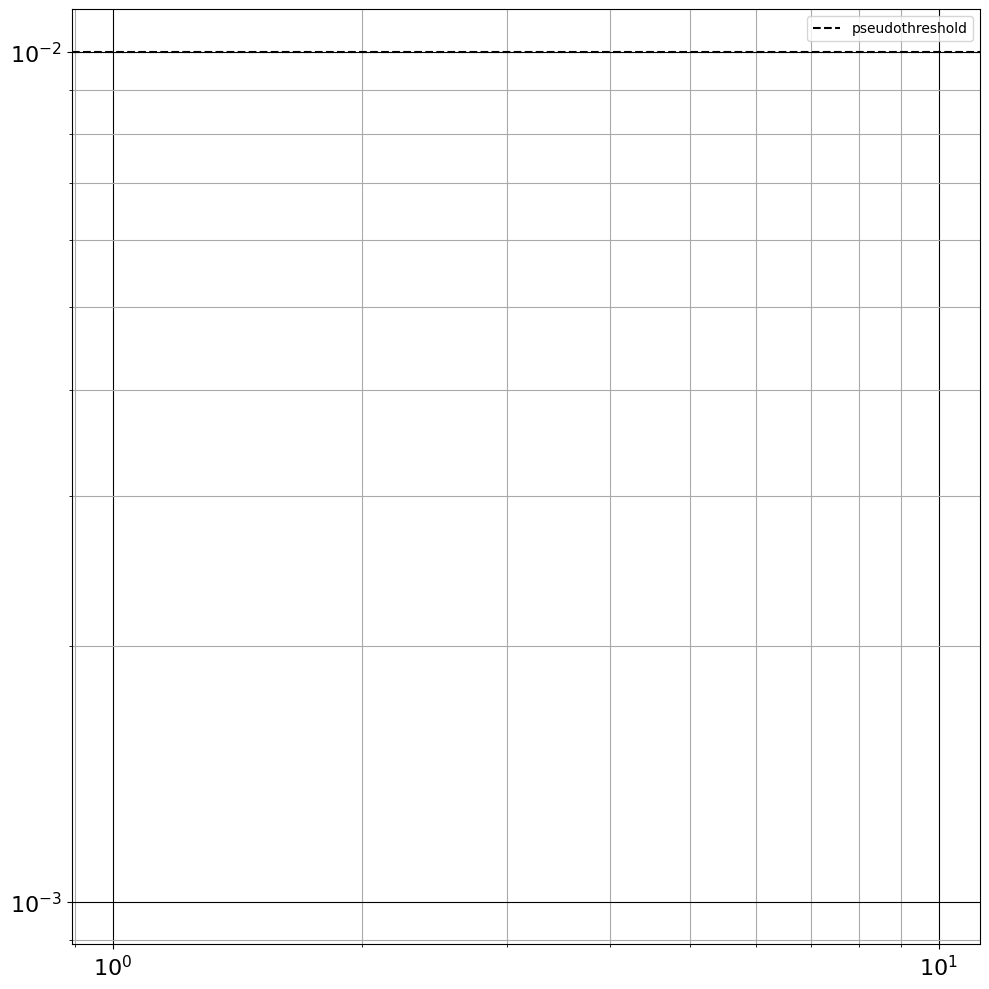

In [373]:
fig, ax = plt.subplots(1,1, tight_layout=False, figsize=(10,10))

per = 0.01
greens = plt.get_cmap('Greens')(np.linspace(0.3, 1, 5))[::-1]

for gauge_factor, samples in enumerate([samples_fcc_triple, samples_fcc2_triple, samples_fcc3_triple, samples_fcc4_triple, samples_fcc5_triple]):
    sinter.plot_error_rate(
                ax=ax,
                stats=samples,
                filter_func=lambda stat: stat.json_metadata['distance'] == 4 and stat.json_metadata['p'] == per,
                x_func=lambda stat: stat.json_metadata['bias'],
                highlight_max_likelihood_factor=1,
                plot_args_func = lambda index,curve_id: {'color': greens[gauge_factor], 'linewidth':3, 'marker' : 'o', 'label': gauge_factor+1})

ax.set_yscale('log')
ax.set_xscale('log')
ax.axhline(y=per, color='black', linestyle='--', label='pseudothreshold')

ax.legend()
ax.grid(which='minor', color='#AAAAAA')
ax.grid(which='major', color='black')
ax.minorticks_on()
ax.tick_params(axis='both', which='major', labelsize=16)